# A0.4 Damped vibration - main
by H cyan

huangzw29@mail2.sysu.edu.cn

2021.4.23

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import Rbf

## EXP1 Steel rule 
data processing: A0.4 Damped vibration - batch processing.ipynb <br>
data source: Phyphox

In [3]:
df = pd.read_excel('Steel_rule_vibration_indirect.xlsx')
df = df.set_index('Unnamed: 0')
print(df)

                     0           1           2           3           4  \
Unnamed: 0                                                               
L           130.000000  140.000000  160.000000  170.000000  180.000000   
T             0.126357    0.131243    0.161960    0.174934    0.193371   
F             7.914086    7.619436    6.174345    5.716448    5.171402   
beta          0.318709    0.276986    0.193585    0.182484    0.156840   

                     5  
Unnamed: 0              
L           190.000000  
T             0.212973  
F             4.695429  
beta          0.144574  


6396.861659217057 -1.3696881467797508


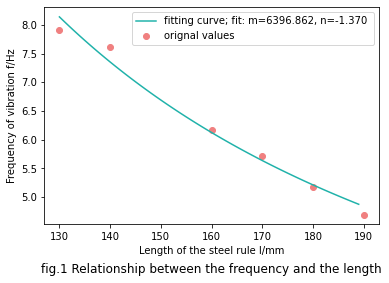

In [10]:
l = np.array(df.loc['L'])
f = np.array(df.loc['F'])
plt.scatter(l, f, color='lightcoral', label='orignal values')

def f_l(l, A1, A2):
    return A1*(l**A2)

popt, pcov = curve_fit(f_l, l, f)
A1, A2 = popt
fvals = f_l(np.arange(130,190,1), A1, A2)

plt.plot(np.arange(130,190,1), fvals, color='lightseagreen', label='fitting curve; fit: m=%5.3f, n=%5.3f ' % tuple(popt))
plt.legend()
plt.xlabel('Length of the steel rule l/mm')
plt.ylabel('Frequency of vibration f/Hz')
plt.title('fig.1 Relationship between the frequency and the length', y=-0.25)
print(A1, A2)

## EXP2 Torsional Pendulum
data source: Tracker

In [5]:
tp = pd.read_csv('Torsional_Pendulum.csv')
tp['theta'] = tp['theta']*np.pi/180
tp['t'] = tp['t'] - tp.iloc[0,0]  
tp.reset_index(drop=True, inplace=True)
tp.head(10)

,t,theta
0,0.000000,0.125160
1,0.034922,0.126834
2,0.069844,0.127707
3,0.104778,0.128380
4,0.139700,0.127176
5,0.174633,0.121049
6,0.209556,0.113228
7,0.244478,0.101466
8,0.279411,0.089871
9,0.314333,0.075254


Text(0.5, -0.25, 'fig.1 Original curve of torsional pendulum')

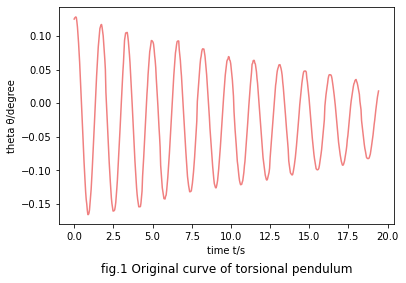

In [12]:
plt.plot(tp['t'], tp['theta'], color='lightcoral')
plt.xlabel('time t/s')
plt.ylabel('theta θ/degree')
plt.title('fig.1 Original curve of torsional pendulum', y=-0.25)

Text(0.5, -0.25, 'fig.2 Fitting curve of torsional pendulum')

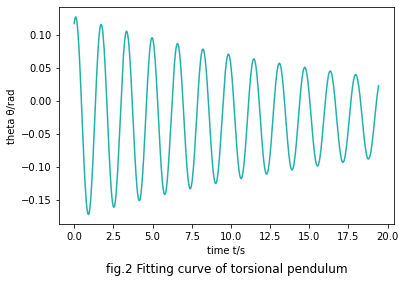

In [7]:
t = np.array(tp['t'])
a = np.array(tp['theta'])

def theta_t(t, A1, bt, omg, A4, A5):
    return A1 * np.exp(-bt*t) * np.cos(omg*t + A4) + A5


popt, pcov = curve_fit(theta_t, t, a)

avals = theta_t(t, popt[0], popt[1], popt[2], popt[3], popt[4])
Omega = popt[2]
beta = popt[1]
A0 = popt[0]


plt.plot(t, avals, color='lightseagreen')
plt.xlabel('time t/s')
plt.ylabel('theta θ/rad')
plt.title('fig.2 Fitting curve of torsional pendulum', y=-0.25)

Text(0.5, -0.25, 'fig.3 Torsional pendulum')

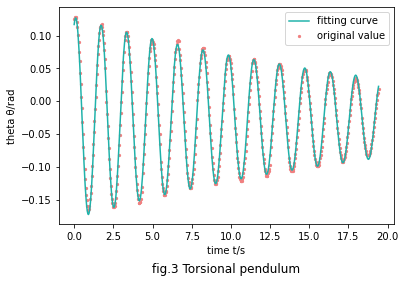

In [8]:
plt.scatter(tp['t'], tp['theta'], color='lightcoral', s=5, label='original value')
plt.plot(t, avals, color='lightseagreen', label='fitting curve')
plt.legend()
plt.xlabel('time t/s')
plt.ylabel('theta θ/rad')
plt.title('fig.3 Torsional pendulum', y=-0.25)

In [9]:
print('omega: '+str(Omega), 'T: '+str(2*np.pi/Omega), 'beta: '+str(beta), 'A0: '+str(A0))

omega: 3.8683239024653076 T: 1.6242655645188533 beta: 0.04749998140840991 A0: 0.15328187404487462
